In [125]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq
from pyMRI.utils import RMSE

In [126]:
def gaussian_filter(size, epsilon):
    x_l, y_l = size
    x_ = np.arange(-x_l//2, x_l//2, 1.0)
    y_ = np.arange(-y_l//2, y_l//2, 1.0)
    x, y = np.meshgrid(x_, y_)
    g = (1/epsilon*np.sqrt(2*np.pi))*np.exp(-0.5*(x**2 + y**2)/epsilon**2)
    
    return g/np.sum(g)

(-0.5, 629.5, 629.5, -0.5)

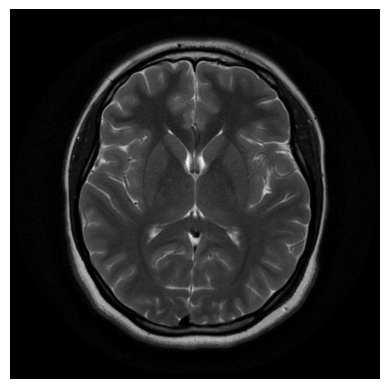

In [127]:
# img = iio.imread("axial_brain_2.png")
img = iio.imread("axial_brain.jpeg")

plt.imshow(img, cmap = "gray")
plt.axis("off")

(-0.5, 629.5, 629.5, -0.5)

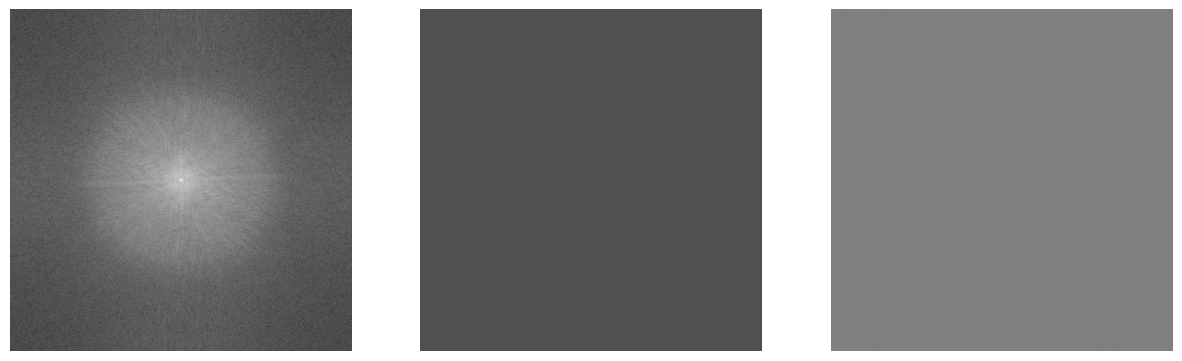

In [128]:
imgfft = fft2(img)
imgfft = fftshift(imgfft)

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(np.log(np.abs(imgfft)), cmap = "gray")
plt.axis("off")

plt.subplot(132)
plt.imshow(imgfft.real, cmap = "gray")
plt.axis("off")

plt.subplot(133)
plt.imshow(imgfft.imag, cmap = "gray")
plt.axis("off")

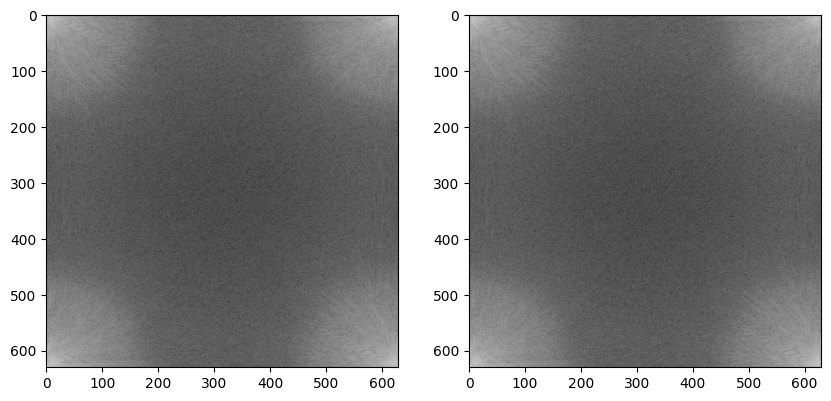

(4.889632691629231e-06-1.1204974725842476e-09j)
(4.118192009627819e-09-1.7462298274040222e-10j)


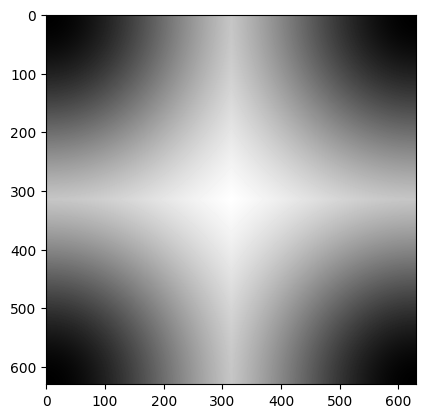

In [129]:

imgfft = ifftshift(imgfft)

one = np.ones_like(imgfft)
one[0, 0] = 0.0
one[-1, 0] = 0.0
one[0, -1] = 0.0
one[-1, -1] = 0.0

row_even_zero = np.zeros_like(imgfft)
row_even_zero[ ::2 ] = 1.0

col_even_zero = np.zeros_like(imgfft)
col_even_zero[ :, ::2 ] = 1.0

row_remove = row_even_zero[:, 0].astype(bool)
col_remove = col_even_zero[0, :].astype(bool)

row_5_remove = np.zeros(imgfft.shape[0])
for i in range(row_5_remove.shape[0]//5):
    if i % 2 == 0:
        row_5_remove[5*i: 5*(i + 1)] = 1.0

row_5_remove = row_5_remove.astype(bool)

gaussian_f = gaussian_filter(imgfft.shape, 200.0)

imgfft_gaussian = imgfft*ifftshift(gaussian_f)
imgfft_inv_gaussian = imgfft*ifftshift(1.0 - gaussian_f)

imgfft_zero_freq = imgfft*one

imgfft_row_even_zero = imgfft*row_even_zero

imgfft_col_even_zero = imgfft*col_even_zero

imgfft_row_remove = imgfft[row_remove, :]
imgfft_col_remove = imgfft[:, col_remove]

imgfft_row_5 = imgfft[row_5_remove, :]

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(np.log(np.abs(imgfft_inv_gaussian)), cmap = "gray")
plt.subplot(122)
plt.imshow(np.log(np.abs(imgfft)), cmap = "gray")
plt.show()
# plt.imshow(ifftshift(1.0 - gaussian_filter(imgfft.shape, 1000.0)), cmap = "gray")

print(np.sum(imgfft_inv_gaussian))
print(np.sum(imgfft))

plt.imshow(ifftshift(1.0 - gaussian_f), cmap = "gray")
plt.show()


(-0.5, 629.5, 629.5, -0.5)

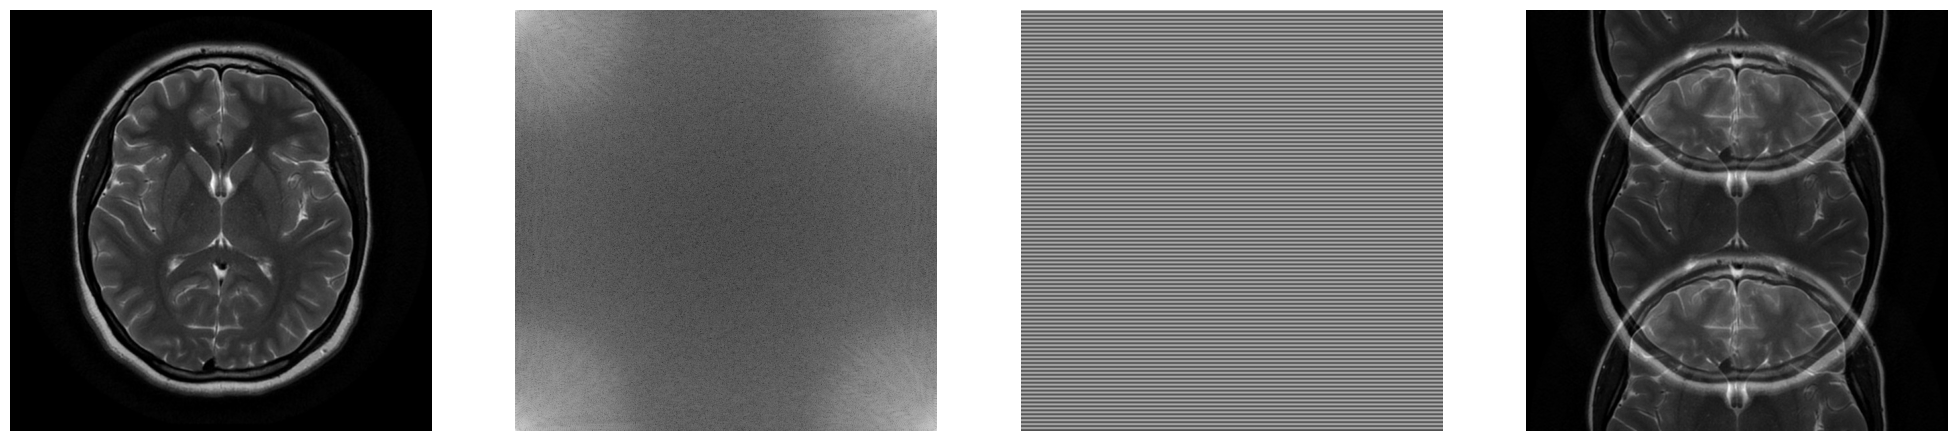

In [130]:
imgfft_row_even_zero = imgfft*row_even_zero

inv_row_even = ifft2(imgfft_row_even_zero)

plt.figure(figsize=(25, 25))
plt.subplot(141)
plt.imshow(img, cmap = "gray")
plt.axis("off")

plt.subplot(142)
plt.imshow(np.log(np.abs(imgfft)), cmap = "gray")
plt.axis("off")

plt.subplot(143)
plt.imshow(row_even_zero.real, cmap = "gray")
plt.axis("off")

plt.subplot(144)
plt.imshow(inv_row_even.real, cmap = "gray")
plt.axis("off")


(0.0002376900214384535-4.655961291829263e-16j)


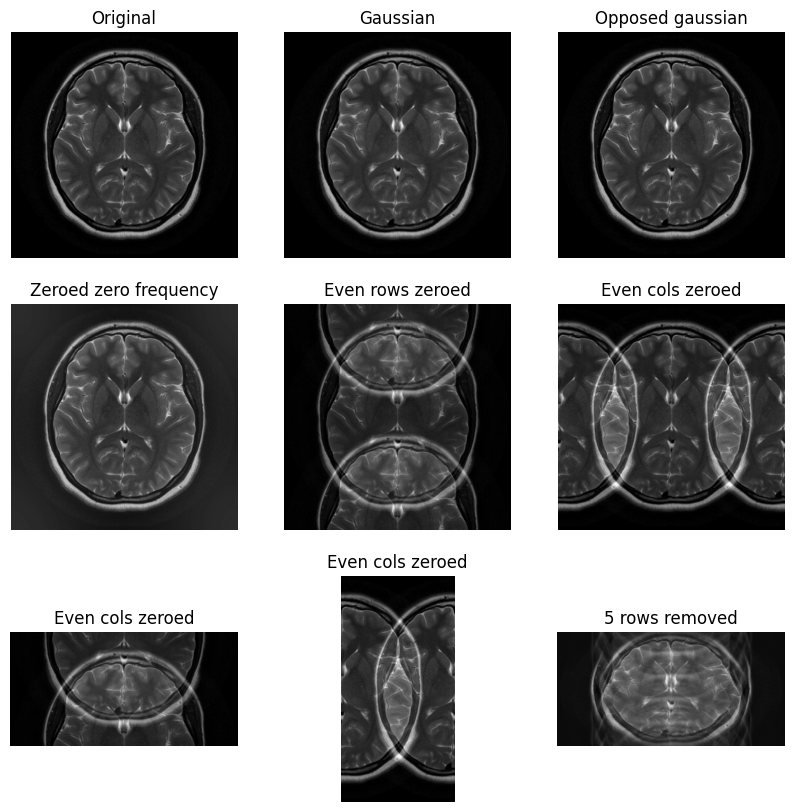

In [131]:
inv_gaussian = ifft2(imgfft_gaussian)

inv_inv_gaussian = ifft2(imgfft_inv_gaussian)

inv_zero = ifft2(imgfft_zero_freq)

inv_row_even = ifft2(imgfft_row_even_zero)

inv_col_even = ifft2(imgfft_col_even_zero)

inv_row_remove = ifft2(imgfft_row_remove)

inv_col_remove = ifft2(imgfft_col_remove)

inv_5_row = ifft2(imgfft_row_5)

plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.title("Original")

plt.subplot(332)
plt.imshow(inv_gaussian.real, cmap = "gray")
plt.axis("off")
plt.title("Gaussian")

plt.subplot(333)
plt.imshow(inv_inv_gaussian.real, cmap = "gray")
plt.axis("off")
plt.title("Opposed gaussian")

plt.subplot(334)
plt.imshow(inv_zero.real, cmap = "gray")
plt.axis("off")
plt.title("Zeroed zero frequency")

plt.subplot(335)
plt.imshow(inv_row_even.real, cmap = "gray")
plt.axis("off")
plt.title("Even rows zeroed")

plt.subplot(336)
plt.imshow(inv_col_even.real, cmap = "gray")
plt.axis("off")
plt.title("Even cols zeroed")

plt.subplot(337)
plt.imshow(inv_row_remove.real, cmap = "gray")
plt.axis("off")
plt.title("Even cols zeroed")

plt.subplot(338)
plt.imshow(inv_col_remove.real, cmap = "gray")
plt.axis("off")
plt.title("Even cols zeroed")

plt.subplot(339)
plt.imshow(inv_5_row.real, cmap = "gray")
plt.axis("off")
plt.title("5 rows removed")

print(RMSE(img, inv_inv_gaussian))